<a href="https://colab.research.google.com/github/santiagoahl/clustering-algorithms/blob/main/04_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[What is DBSCAN?](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=MLAkzjeNZx_f)

>[When is DBSCAN useful?](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=0ih9003bdbtJ)

>>[Advantages](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=0ih9003bdbtJ)

>>[Disadvantages](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=0ih9003bdbtJ)

>[Implementation](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=oCjnd5hDeLqZ)

>>[Data Import](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=qyE_Wb28fENS)

>>[DBSCAN Algorithm](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=qkVBMQyFg2Fd)

>[Hyperparameter optimization](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=v97i7qvhiyv8)

>[Model Viz](#folderId=1JTG0PItAr7T5s0GtjUxkhje_YH6X1cV9&updateTitle=true&scrollTo=D3ExB8OPaqfc)



# What is DBSCAN?

Density Based Clustering of Aplication with Noise

- Clustering based on density
- Each cluster is formed by high data points density
- Each cluster has a neighborhood $B_ϵ(x)$
- Parameters
  - Eps (Epsilon, neighborhood radius)
  - MinPts (Min points per cluster)

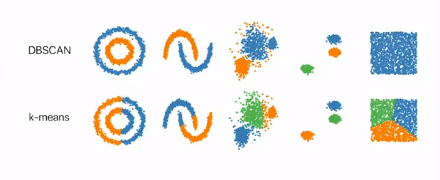


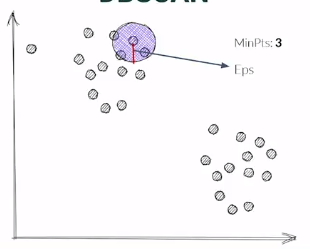

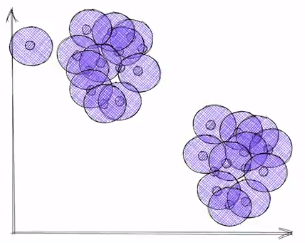

[Visualizing DBScan](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)


# When is DBSCAN useful?

- K is unknown
- Non-spheric data
- Same density in clusters

## Advantages

- Don't need the number of clusters
- Can find outliers
- Can cluster non-spheric forms

## Disadvantages 

- Hyperparameters are determinant
- Bound points can belong to any cluster



# Implementation

## Data Import

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [40]:
X, y, c = make_blobs(200, centers=4, cluster_std=0.8, n_features=2, return_centers=True)

In [41]:
df_blobs = pd.DataFrame({
    'x1':X[:, 0],
    'x2':X[:,1],
    'y':y
})

df_centers = pd.DataFrame({
    'x1':c[:, 0],
    'x2':c[:, 1]
})

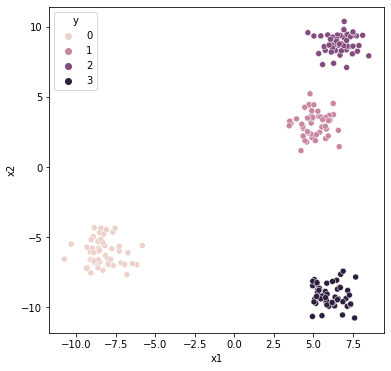

In [42]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='y')
plt.show()

In [5]:
X_m, y_m= make_moons(200, noise=0.08, random_state=42)

In [6]:
df_moons = pd.DataFrame({
    'x1':X_m[:, 0],
    'x2':X_m[:,1],
    'y':y_m
})

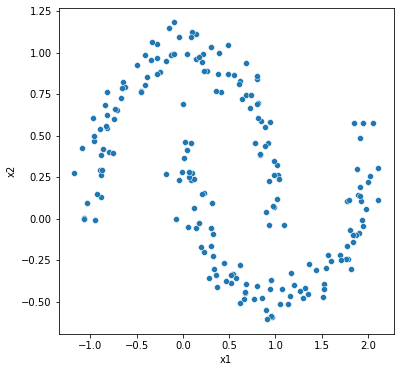

In [7]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

## DBSCAN Algorithm

In [8]:
dbscan_blobs = DBSCAN(eps=1.0, min_samples=4)
y_pred = dbscan_blobs.fit_predict(X)
df_blobs['cluster'] = y_pred

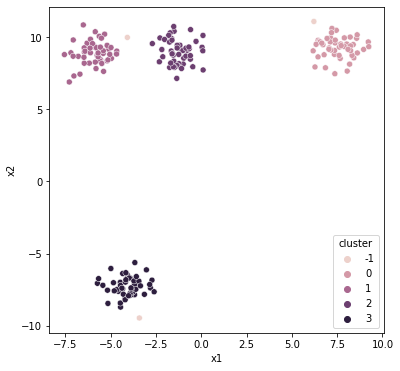

In [9]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show()

In [10]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
y_m_pred = dbscan.fit_predict(X_m)
df_moons['cluster'] = y_m_pred

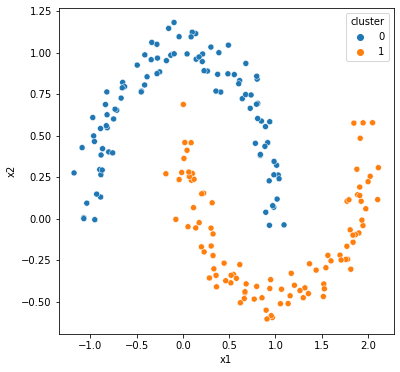

In [11]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

# Hyperparameter optimization

In [27]:
from sklearn.neighbors import NearestNeighbors

In [28]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

In [29]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

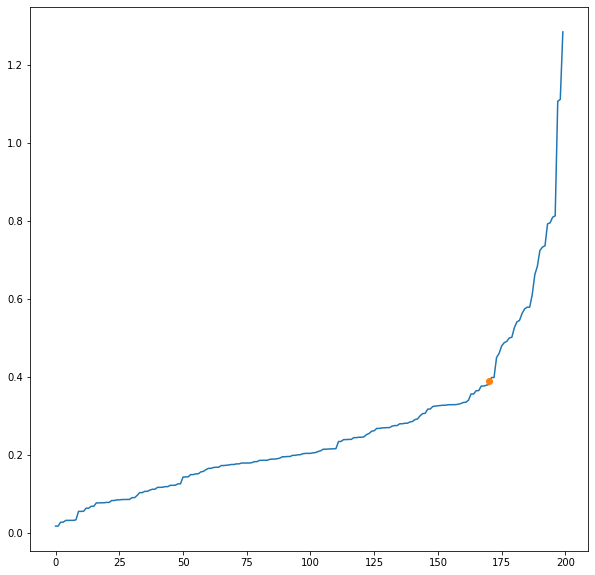

In [33]:
fig = plt.figure(figsize=(10,10))
plt.plot(distances)
plt.plot([170], [0.39], marker='o')
plt.show()

In [73]:
eps_values = np.arange(0.3, 0.9, 0.05)
min_samples = np.arange(2, 10)

In [74]:
eps_values

array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ,
       0.85, 0.9 ])

In [75]:
dbscan_params = list(product(eps_values, min_samples))

In [76]:
sil_scores = []

for param in dbscan_params:
  model = DBSCAN(eps=param[0], min_samples=param[1])
  y_pred = model.fit_predict(X)
  if np.unique(model.labels_).size == 1:
    sil_scores.append(-1)
    continue
  sil_scores.append(silhouette_score(X, y_pred, metric='euclidean'))

In [77]:
records = pd.DataFrame(dbscan_params, columns = ['Eps', 'Min Samples'])
records['Sil scores'] = sil_scores

In [78]:
pivot_data = pd.pivot_table(records, values = 'Sil scores', index = 'Min Samples', columns='Eps')
pivot_data

Eps,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90
Min Samples,,,,,,,,,,,,,
2,0.076728,0.134888,0.135225,0.206536,0.222815,0.525137,0.694527,0.580598,0.582982,0.609371,0.771455,0.771455,0.763680
3,-0.093699,0.111416,0.125195,0.187530,0.251724,0.525137,0.694527,0.694527,0.703845,0.728812,0.771455,0.771455,0.763680
4,-0.331166,-0.068830,0.111472,0.309336,0.284375,0.453881,0.648309,0.654392,0.672340,0.719766,0.749354,0.769184,0.763680
5,-0.533410,-0.279464,-0.041379,0.181430,0.347250,0.360753,0.600130,0.618424,0.648416,0.692714,0.739117,0.752294,0.753839
6,-0.628007,-0.456604,-0.235365,0.017516,0.224965,0.336195,0.539123,0.600130,0.648416,0.669595,0.739117,0.749354,0.754090
7,-1.000000,-0.387045,-0.343904,-0.038050,0.129894,0.288102,0.498627,0.538729,0.613127,0.652080,0.712860,0.721233,0.752395
8,-1.000000,-1.000000,-0.351725,-0.337048,0.026910,0.168939,0.415721,0.538729,0.581932,0.611298,0.702802,0.712860,0.734035
9,-1.000000,-1.000000,-0.009090,-0.097707,0.051100,0.027637,0.247631,0.480808,0.537406,0.594680,0.652320,0.667978,0.713517


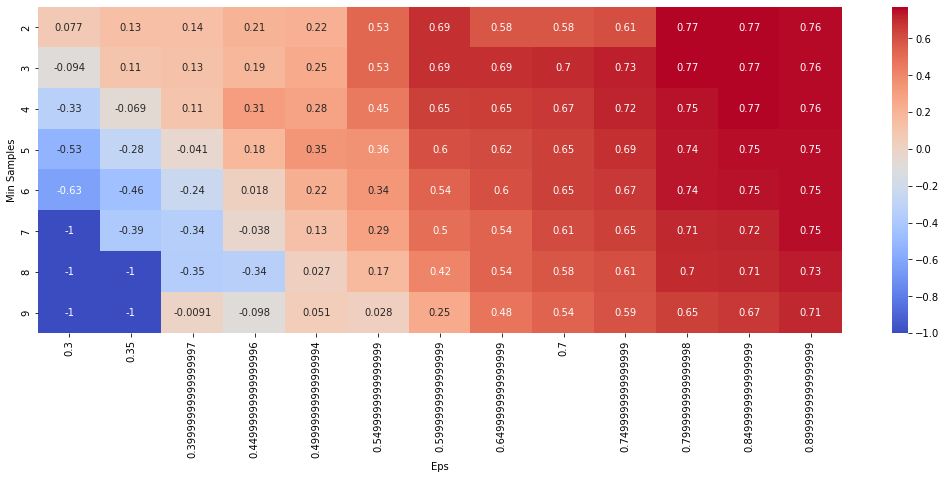

In [79]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [91]:
dbscan_blobs = DBSCAN(eps=0.6, min_samples=5)
y_pred = dbscan_blobs.fit_predict(X)
df_blobs['cluster'] = y_pred

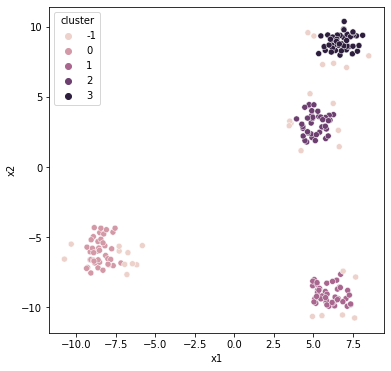

In [92]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.show()

# Model Viz

For n_clusters = 5 The average silhouette_score is : 0.6483085151544821


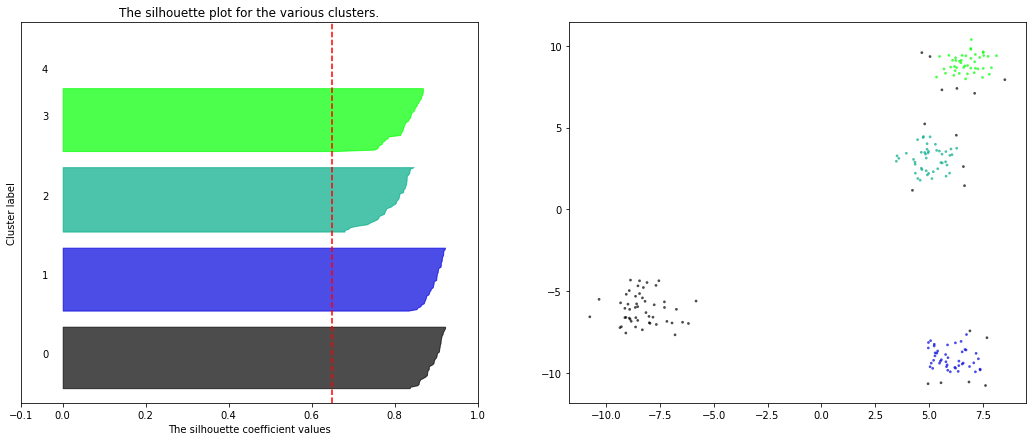

In [94]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.6, min_samples=4)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()